In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [2]:
import pandas as pd
from ShotMaps import shot_data
from Data.Understat_Data import scrape_match_shots
from mplsoccer import Pitch
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Get and handle data

In [3]:
sd = scrape_match_shots(23092)

shotdata = shot_data(sd, data_source='Understat')
print(shotdata)

shot_data object of Understat of shape (29, 7).


In [4]:
rescaled_data = shotdata.rescale_shot_data()
rescaled_data

,x,y,xG,minute,team,player,result
0,117.360004,28.400000,0.06,1,Bayern Munich,Serge Gnabry,MissedShots
1,106.200000,50.479999,0.09,2,Bayern Munich,Konrad Laimer,SavedShot
2,117.239996,35.760001,0.45,6,Bayern Munich,Harry Kane,Goal
3,99.119998,37.760001,0.07,10,Bayern Munich,Leroy Sané,MissedShots
4,108.719998,44.079999,0.04,34,Bayern Munich,Thomas Müller,SavedShot
5,113.160004,50.320001,0.09,34,Bayern Munich,Serge Gnabry,BlockedShot
6,93.600000,40.239999,0.03,42,Bayern Munich,Leroy Sané,SavedShot
7,104.519998,35.839999,0.07,42,Bayern Munich,Kim Min-Jae,BlockedShot
8,110.039996,34.160001,0.10,43,Bayern Munich,Leon Goretzka,SavedShot
9,112.919998,24.159998,0.30,44,Bayern Munich,Serge Gnabry,SavedShot


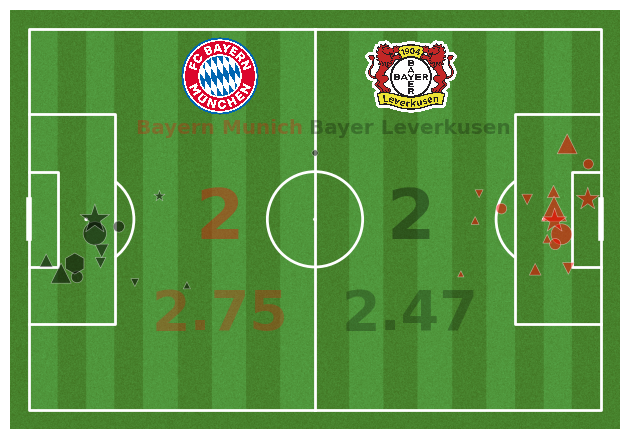

In [5]:
shotdata.static_shotmap(color1='red', color2='black', home_image ='bay.png', away_image='bay04.png')